<a href="https://colab.research.google.com/github/dreamofu/FarmOpt.AI/blob/main/Forecasting_Harga_Beras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import os
import tensorflow as tf
import keras
import scikit

import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime

import seaborn as sns
import plotly.graph_objects as go
from pylab import rcParams

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Lambda
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Dataset
df_beras = pd.read_csv('/content/drive/MyDrive/Crude Palm Oil Dataset/Beras Dataset/(Trial) Comodity Dataset - Sheet1.csv')
df_beras.head()

,Periode,Data Inflasi (%),Produksi (Juta Ton),Harga Beras
0,1/1/2021,1.55,1.20,9404.74
1,2/1/2021,1.38,2.34,9386.31
2,3/1/2021,1.37,5.57,9153.68
3,4/1/2021,1.42,4.48,8978.86
4,5/1/2021,1.68,2.28,8909.50


In [ ]:
# mengubah bentuk data kolom "Periode" menjadi datetime
df_beras["Periode"] = pd.to_datetime(df_beras["Periode"])

# Print bentuk baru
print(df_beras.head())

     Periode  Data Inflasi (%)  Produksi (Juta Ton)  Harga Beras
0 2021-01-01              1.55                 1.20      9404.74
1 2021-02-01              1.38                 2.34      9386.31
2 2021-03-01              1.37                 5.57      9153.68
3 2021-04-01              1.42                 4.48      8978.86
4 2021-05-01              1.68                 2.28      8909.50


In [ ]:
print(df_beras.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Periode              34 non-null     datetime64[ns]
 1   Data Inflasi (%)     34 non-null     float64       
 2   Produksi (Juta Ton)  34 non-null     float64       
 3   Harga Beras          34 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.2 KB
None


In [ ]:
print(df_beras.isnull().sum())

Periode                0
Data Inflasi (%)       0
Produksi (Juta Ton)    0
Harga Beras            0
dtype: int64


In [ ]:
# df.sample(n=13)
df_beras[12:25]

,Periode,Data Inflasi (%),Produksi (Juta Ton),Harga Beras
12,2022-01-01,2.18,1.42,9381.24
13,2022-02-01,2.06,2.35,9358.61
14,2022-03-01,2.64,5.49,9323.35
15,2022-04-01,3.47,4.45,9104.35
16,2022-05-01,3.55,2.38,9065.18
17,2022-06-01,4.35,2.51,9007.86
18,2022-07-01,4.94,2.71,9091.92
19,2022-08-01,4.69,2.35,9358.34
20,2022-09-01,5.95,2.47,9785.04
21,2022-10-01,5.71,2.38,10043.47


In [ ]:
# Informasi bentuk tanggal
print(df_beras["Periode"][0])

2021-01-01 00:00:00


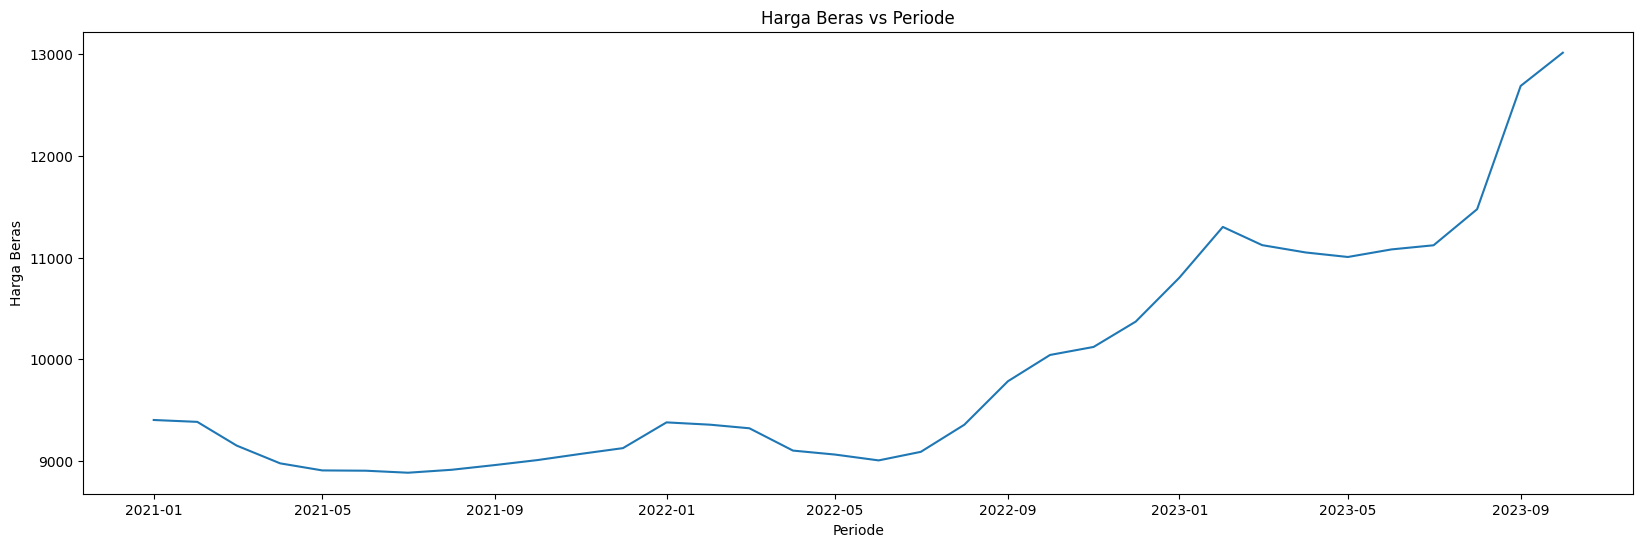

In [ ]:
plt.figure(figsize=(20, 6)) # set bentuk figure
plt.title("Harga Beras vs Periode")
plt.plot(df_beras['Periode'],
          df_beras['Harga Beras'])
plt.xlabel("Periode")
plt.ylabel("Harga Beras")

plt.show()

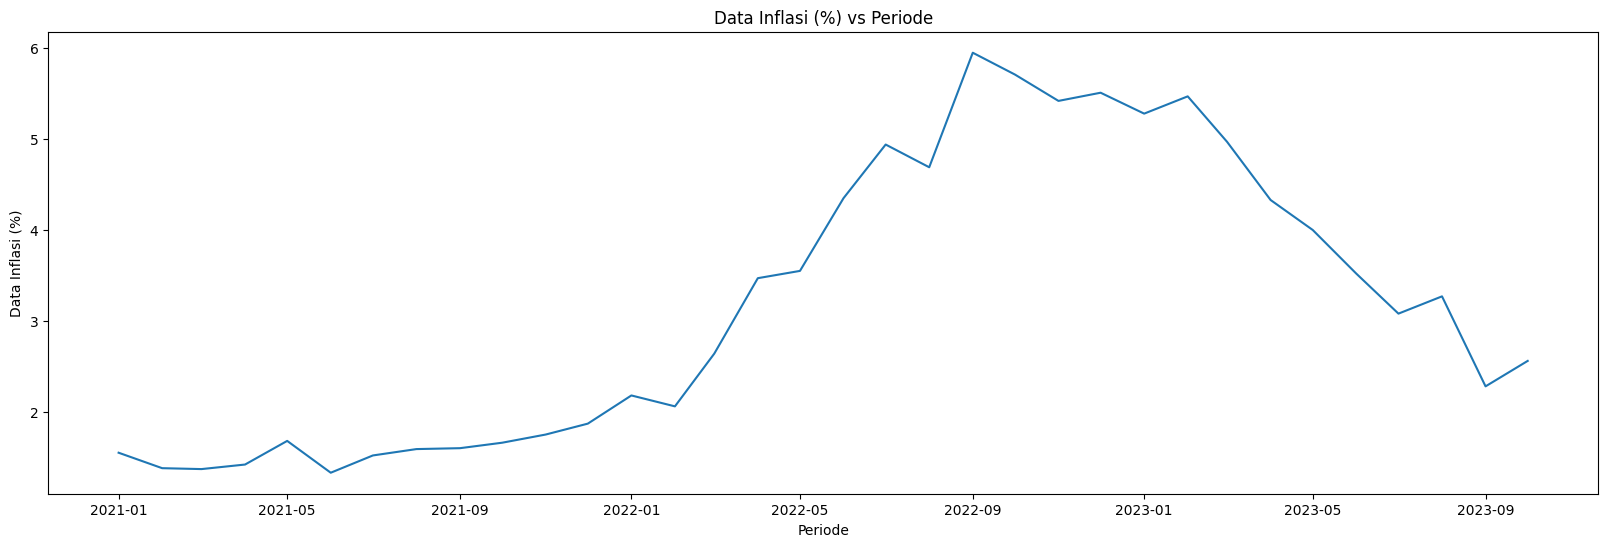

In [ ]:
plt.figure(figsize=(20, 6)) # set bentuk figure
plt.title("Data Inflasi (%) vs Periode")
plt.plot(df_beras['Periode'],
          df_beras['Data Inflasi (%)'])
plt.xlabel("Periode")
plt.ylabel("Data Inflasi (%)")

plt.show()

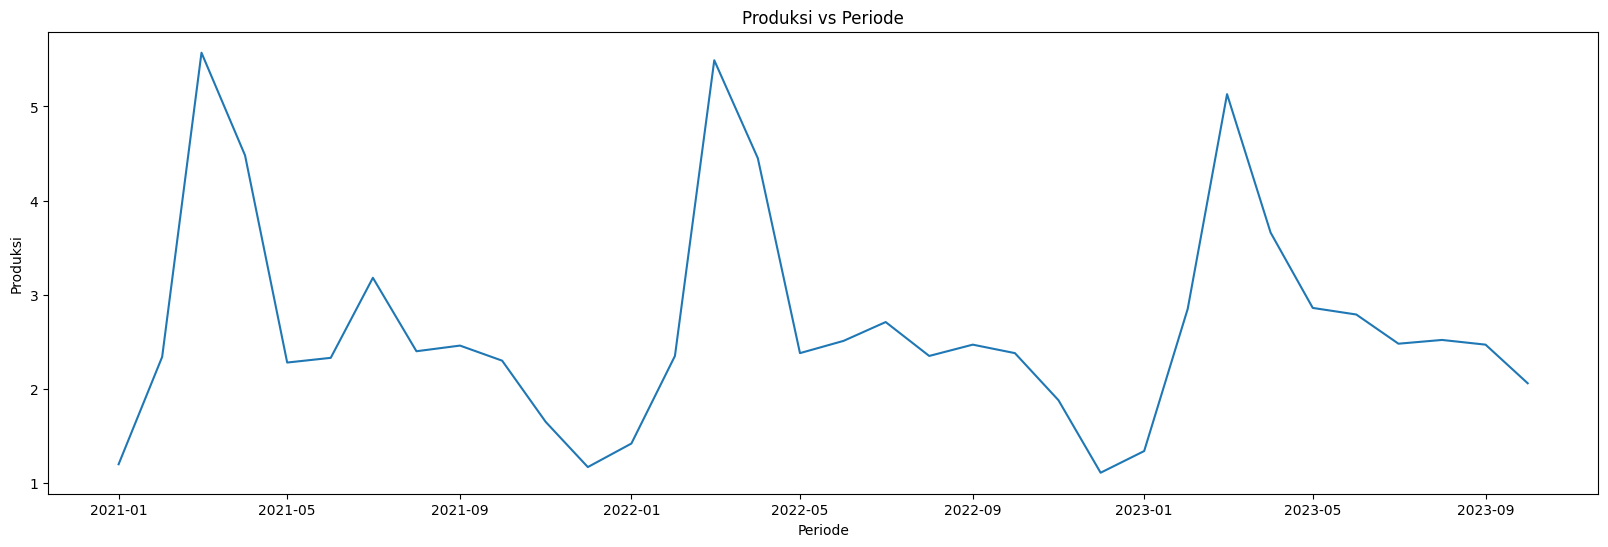

In [ ]:
plt.figure(figsize=(20, 6)) # set bentuk figure
plt.title("Produksi vs Periode")
plt.plot(df_beras['Periode'],
          df_beras['Produksi (Juta Ton)'])
plt.xlabel("Periode")
plt.ylabel("Produksi")

plt.show()

In [ ]:
df_beras.corr()

<ipython-input-271-f74c0194c716>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_beras.corr()


,Data Inflasi (%),Produksi (Juta Ton),Harga Beras
Data Inflasi (%),1.000000,-0.053622,0.355913
Produksi (Juta Ton),-0.053622,1.000000,-0.044915
Harga Beras,0.355913,-0.044915,1.000000


<ipython-input-324-1923e5a1053f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_beras.loc[:, 'Periode':'Harga Beras'].corr(), cmap='rocket', annot=True)


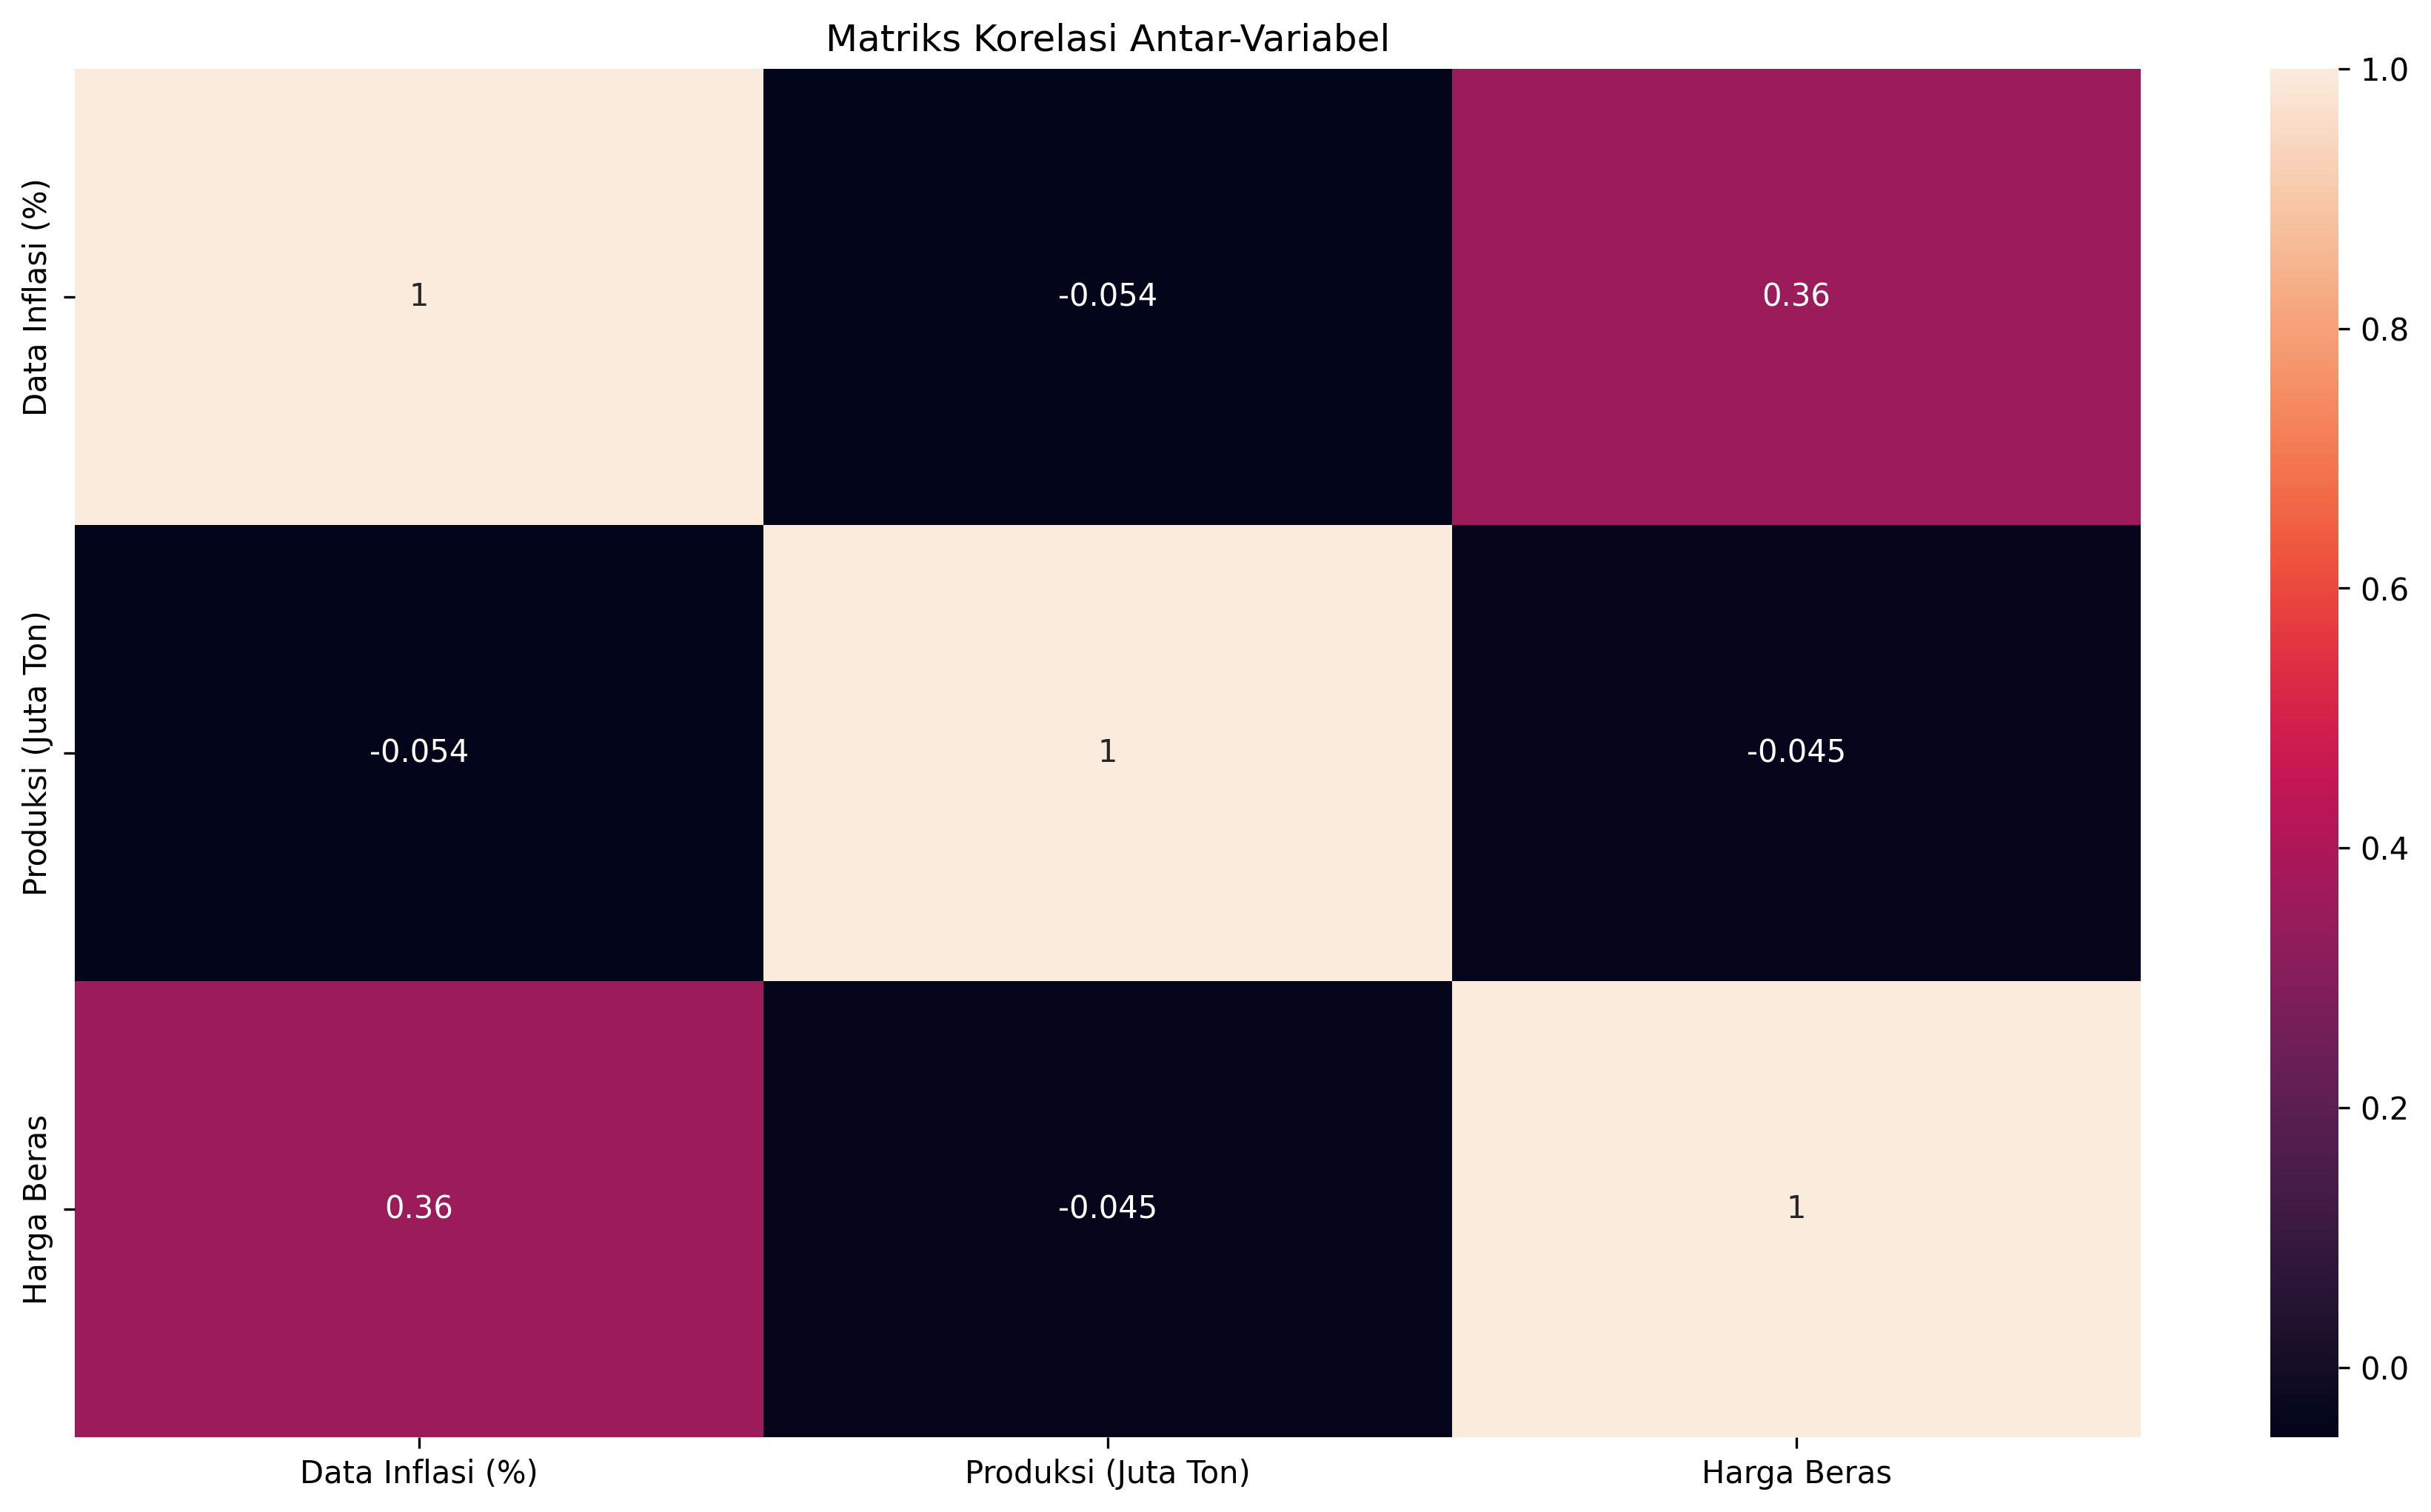

In [ ]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
sns.heatmap(df_beras.loc[:, 'Periode':'Harga Beras'].corr(), cmap='rocket', annot=True)
plt.title('Matriks Korelasi Antar-Variabel')
plt.show()

# Correlation >= 0.5 there is a coherent relationship between variables
# Correlation < 0.5 there is no close relationship between variables

<ipython-input-328-ca39b06232c8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_beras.loc[:, 'Periode':'Harga Beras'].corr(), cmap='rocket', annot=True)


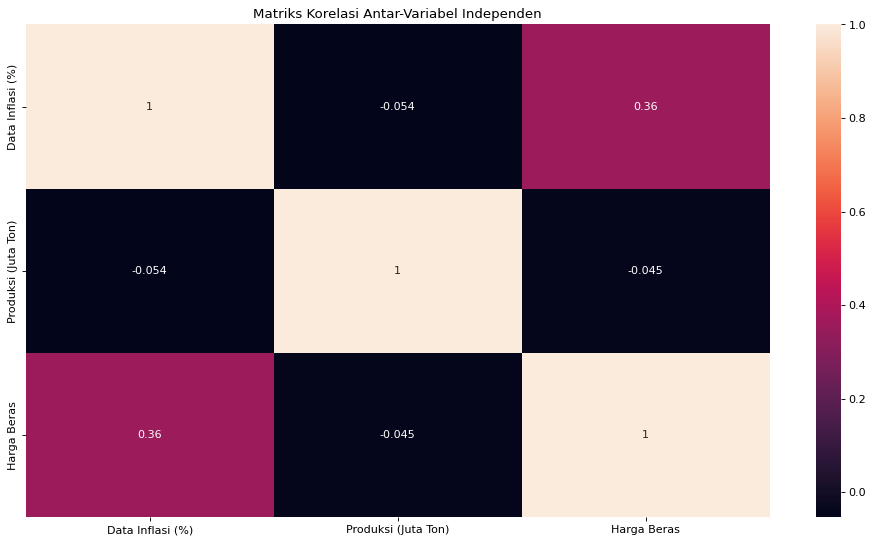

In [ ]:
#checking multicollinearity
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df_beras.loc[:, 'Periode':'Harga Beras'].corr(), cmap='rocket', annot=True)
plt.title('Matriks Korelasi Antar-Variabel Independen')
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df_beras.filter(['Harga Beras'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

29

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.12554732],
       [0.12107907],
       [0.06467927],
       [0.02229517],
       [0.00547924],
       [0.00479312],
       [0.        ],
       [0.00699452],
       [0.01830211],
       [0.03004369],
       [0.04486188],
       [0.05855998],
       [0.11984988],
       [0.11436337],
       [0.10581478],
       [0.0527195 ],
       [0.04322296],
       [0.02932605],
       [0.04970592],
       [0.11429791],
       [0.21774886],
       [0.28040372],
       [0.29947923],
       [0.35983814],
       [0.46423463],
       [0.58522642],
       [0.541858  ],
       [0.52439959],
       [0.51365688],
       [0.53168504],
       [0.54154282],
       [0.6274602 ],
       [0.92091469],
       [1.        ]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(28, len(train_data)):
    x_train.append(train_data[i-28:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 29:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.12554732, 0.12107907, 0.06467927, 0.02229517, 0.00547924,
       0.00479312, 0.        , 0.00699452, 0.01830211, 0.03004369,
       0.04486188, 0.05855998, 0.11984988, 0.11436337, 0.10581478,
       0.0527195 , 0.04322296, 0.02932605, 0.04970592, 0.11429791,
       0.21774886, 0.28040372, 0.29947923, 0.35983814, 0.46423463,
       0.58522642, 0.541858  , 0.52439959])]
[0.5136568832340123]



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
#model.add(Dense(128))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mse')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
1/1 [==============================] - 5s 5s/step - loss: 0.2693 - mse: 0.2693
Epoch 2/25
1/1 [==============================] - 0s 106ms/step - loss: 0.1813 - mse: 0.1813
Epoch 3/25
1/1 [==============================] - 0s 117ms/step - loss: 0.0746 - mse: 0.0746
Epoch 4/25
1/1 [==============================] - 0s 102ms/step - loss: 3.2941e-04 - mse: 3.2941e-04
Epoch 5/25
1/1 [==============================] - 0s 141ms/step - loss: 0.1383 - mse: 0.1383
Epoch 6/25
1/1 [==============================] - 0s 249ms/step - loss: 0.0186 - mse: 0.0186
Epoch 7/25
1/1 [==============================] - 0s 177ms/step - loss: 0.0281 - mse: 0.0281
Epoch 8/25
1/1 [==============================] - 0s 111ms/step - loss: 0.0386 - mse: 0.0386
Epoch 9/25
1/1 [==============================] - 0s 103ms/step - loss: 0.0479 - mse: 0.0479
Epoch 10/25
1/1 [==============================] - 0s 126ms/step - loss: 0.0474 - mse: 0.0474
Epoch 11/25
1/1 [==============================] - 0s 95ms/step 

In [ ]:
# Create the testing data set

test_data = scaled_data[training_data_len - 28: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(28, len(test_data)):
    x_test.append(test_data[i-28:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 39s 39s/step


792.893597427372

<ipython-input-326-3b67f15d8908>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


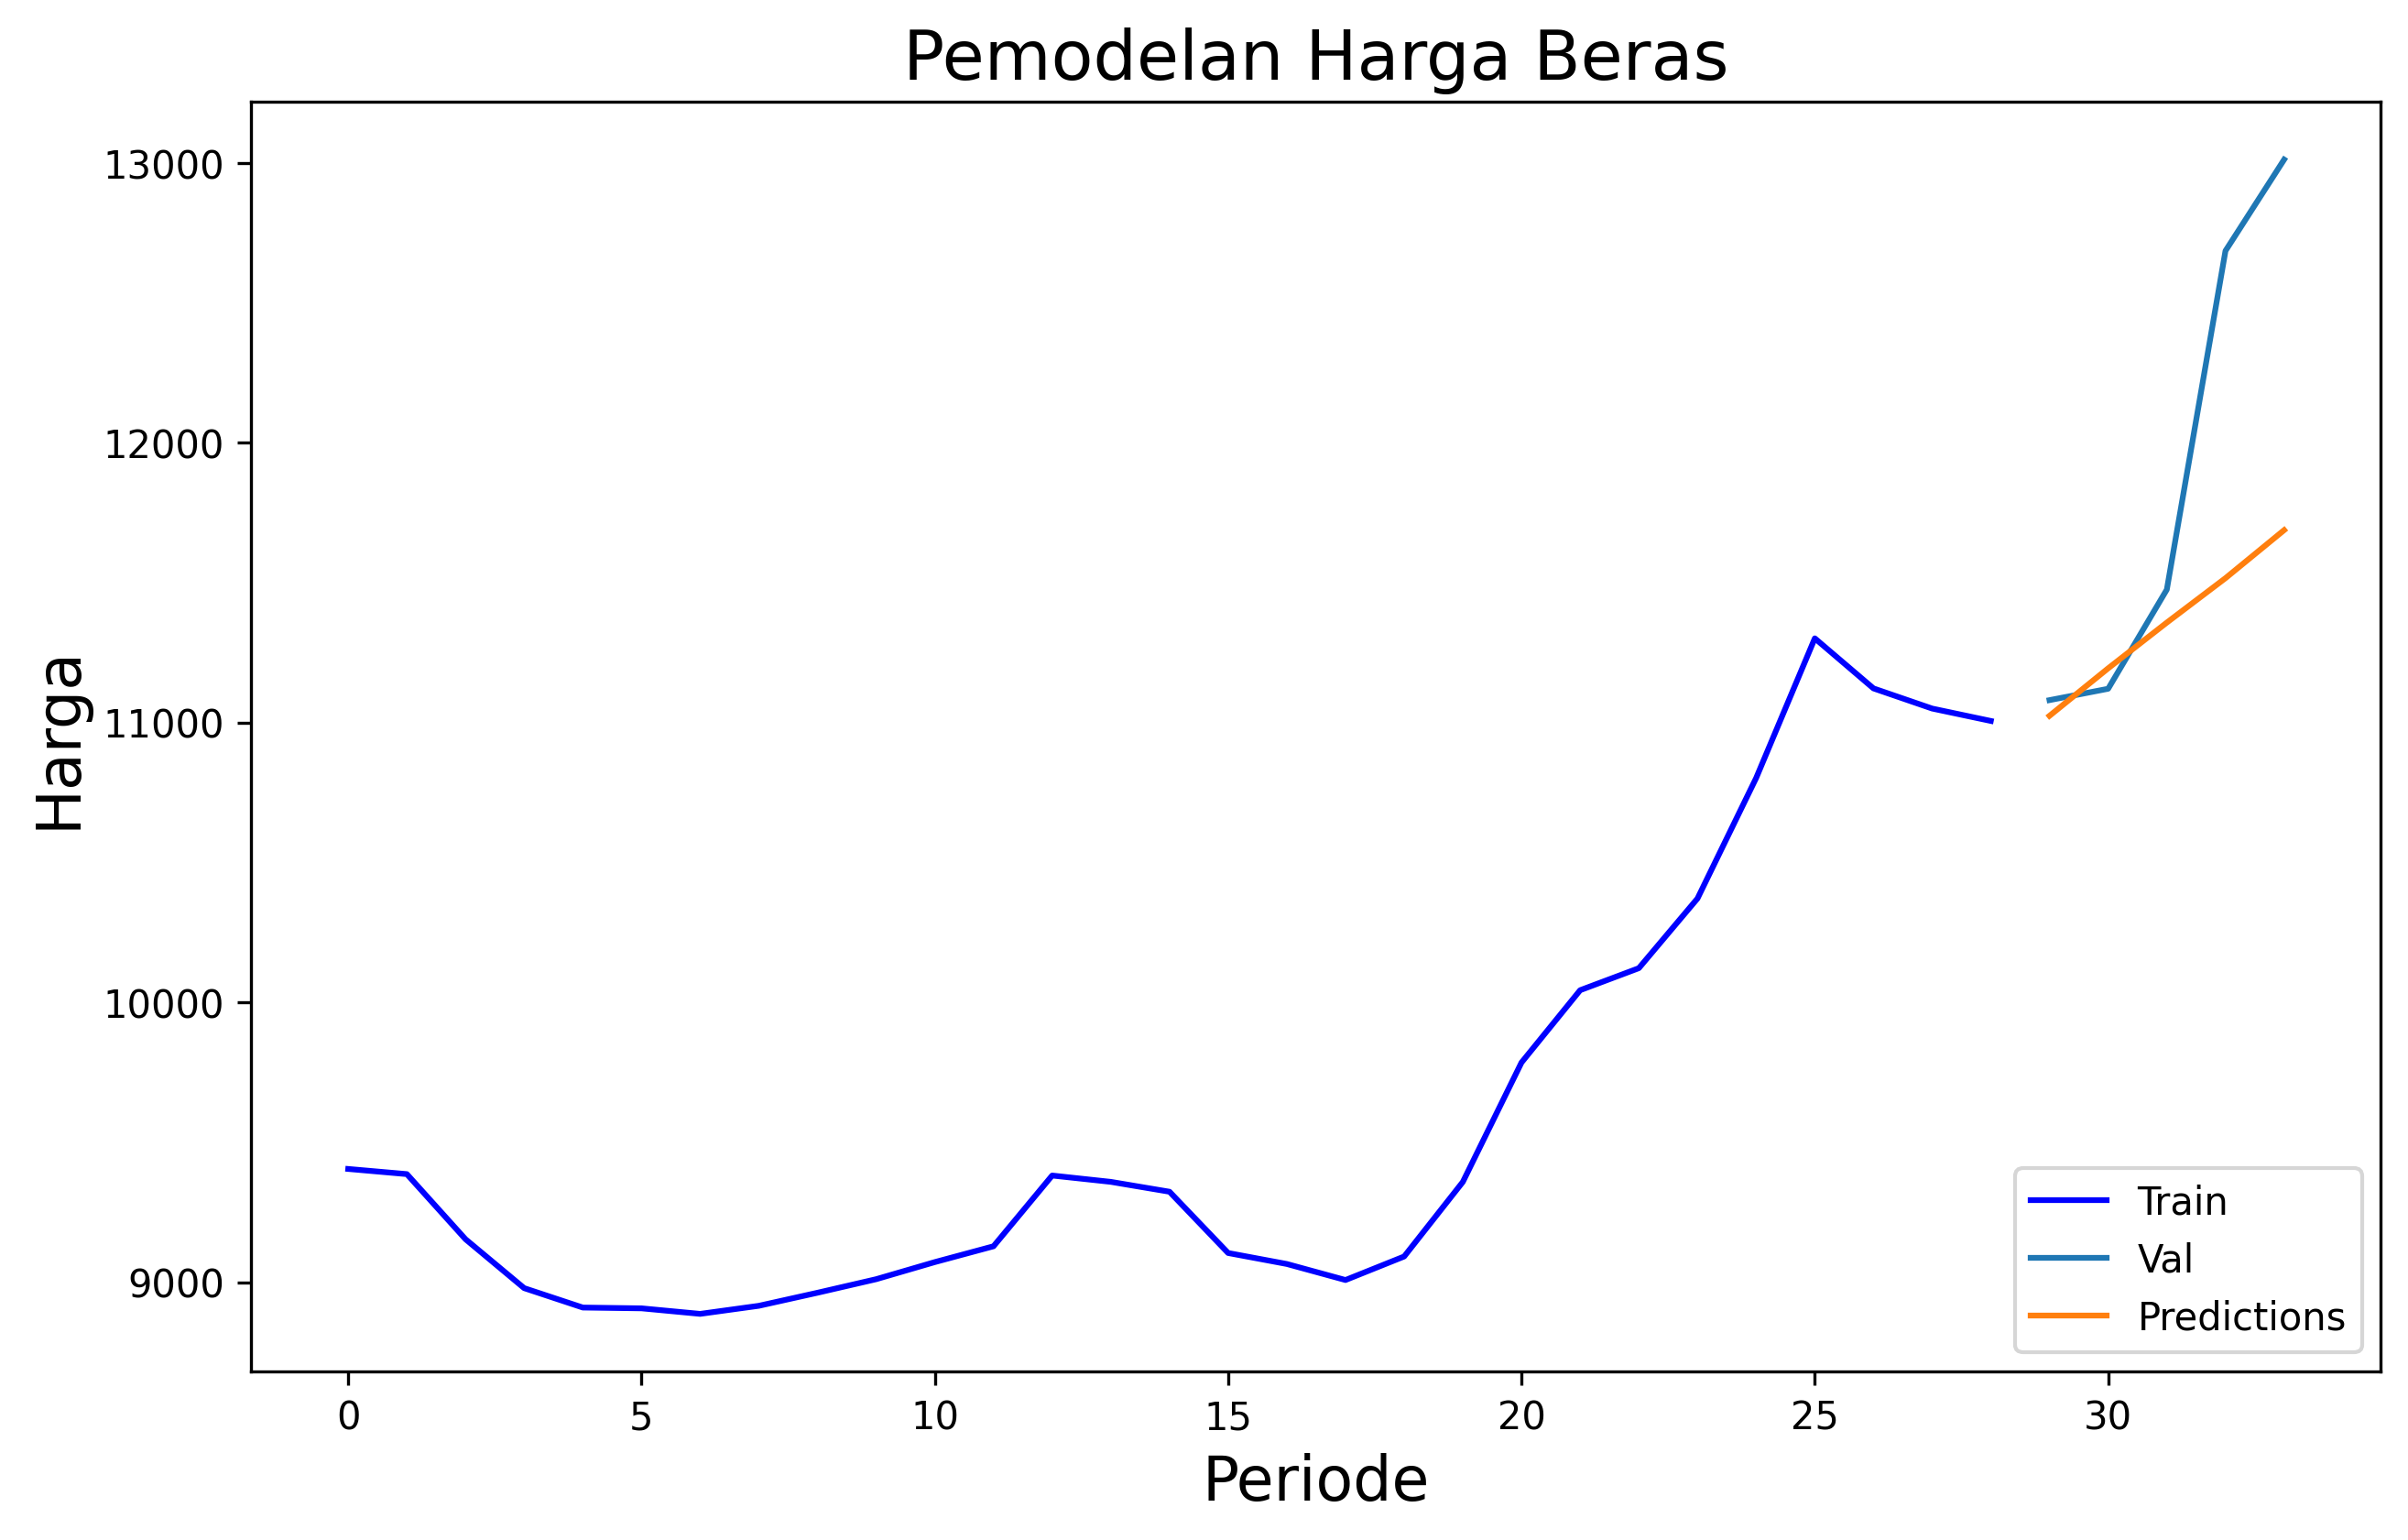

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(10,6), dpi=300)
plt.title('Pemodelan Harga Beras', fontsize=18)
plt.xlabel('Periode', fontsize=16)
plt.ylabel('Harga', fontsize=16)
plt.plot(train['Harga Beras'], color = 'blue')
plt.plot(valid[['Harga Beras', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Harga Beras,Predictions
29,11079.92,11023.838867
30,11120.58,11193.604492
31,11474.96,11357.027344
32,12685.36,11515.805664
33,13011.56,11687.491211


In [ ]:
# Nilai Kesalahan MAE
mae = np.mean(np.abs(df_beras['Harga Beras'] - valid['Predictions']))
print('Mean Absolute Error (MAE) :' "{:4f}".format(mae))

Mean Absolute Error (MAE) :548.132281


In [ ]:
# Nilai Kesalahan MAPE
mape = np.mean(np.abs(df_beras['Harga Beras'] - valid['Predictions'])/(df_beras['Harga Beras'])) * 100
print('Mean Absolute Percentage Error :' "{:3f}".format(mape) + '%')

# Range MAPE:
# < 10% = Model Peramalan Sangat Baik
# 10-20% = Model Peramalan Baik
# 20-50% = Model Peramalan Layak
# > 50% = Model Peramalan Buruk
# sumber: vexpower.com

Mean Absolute Percentage Error :4.317273%


In [ ]:
# Change Point Detection untuk Deteksi Perubahan

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

def detect_changepoint(data, changepoint_range=0.9):
    data_mean = np.mean(data)
    data_std = np.std(data)
    if data_std == 0:
        return 0
    residuals = [(x - data_mean) / data_std for x in data]
    sign_changes = sum([1 if residuals[i] * residuals[i - 1] < 0 else 0 for i in range(1, len(residuals))])
    if sign_changes / len(residuals) > changepoint_range:
        return 1
    else:
        return 0

# load the data
data = df_beras

# transform the date to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# plot the data
plt.figure(figsize=(15, 10))
plt.plot(data.index, data['Soil Fertility'], label='Soil Fertility')
plt.plot(data.index, data['Rice Price'], label='Rice Price')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Soil Fertility and Rice Price Over Time')
plt.legend()
plt.show()

# apply the change point detection to both series
changepoint_soil_fertility = detect_changepoint(data['Soil Fertility'])
changepoint_rice_price = detect_changepoint(data['Rice Price'])

print(f'Change Point in Soil Fertility: { "yes" if changepoint_soil_fertility == 1 else "no"}')
print(f'Change Point in Rice Price: {

### "yes" if changepoint_rice_price == 1 else "no"}')